# Lending Club Loan Analysis

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="whitegrid")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 400)

# file path variable
df = pd.read_csv( "loan.csv",low_memory=False)

# To remove scientific notation and display the full number
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=8, suppress= True)

## Data Cleaning

In [2]:
# Droping columns that are NA
# Droping columns that indicate behaviour post loan provided
# droping columns that arent deemed to be useful for analysis

df.dropna(axis=1, how="all", inplace=True)
df.drop(['inq_last_6mths'], axis=1, inplace=True)   
df.drop(['mths_since_last_record'], axis=1, inplace=True)  
df.drop(['initial_list_status'], axis=1, inplace=True)
df.drop(['out_prncp_inv'], axis=1, inplace=True)
df.drop(['total_pymnt_inv'], axis=1, inplace=True)
df.drop(['last_pymnt_amnt'], axis=1, inplace=True)
df.drop(['next_pymnt_d'], axis=1, inplace=True)
df.drop(['emp_title'], axis=1, inplace=True)
df.drop(['id'], axis=1, inplace=True)
df.drop(['member_id'], axis=1, inplace=True)
df.drop(['funded_amnt'], axis=1, inplace=True)
df.drop(['last_pymnt_d'], axis=1, inplace=True)
df.drop(['recoveries'], axis=1, inplace=True)
df.drop(['last_credit_pull_d'], axis=1, inplace=True)
df.drop(['total_rec_late_fee'], axis=1, inplace=True)
df.drop(['collection_recovery_fee'], axis=1, inplace=True)
df.drop(['total_pymnt'], axis=1, inplace=True)
df.drop(['mths_since_last_delinq'], axis=1, inplace=True)
df.drop(['revol_bal'], axis=1, inplace=True)
df.drop(['revol_util'], axis=1, inplace=True)
df.drop(['loan_amnt'], axis=1, inplace=True)
#df.drop(['term'], axis=1, inplace=True)
df.drop(['url'], axis=1, inplace=True)
df.drop(['desc'], axis=1, inplace=True)
df.drop(['pymnt_plan'], axis=1, inplace=True)
df.drop(['title'], axis=1, inplace=True)
df.drop(['zip_code'], axis=1, inplace=True)
df.drop(['delinq_2yrs'], axis=1, inplace=True)
df.drop(['earliest_cr_line'], axis=1, inplace=True)
df.drop(['open_acc'], axis=1, inplace=True)
df.drop(['pub_rec'], axis=1, inplace=True)
df.drop(['total_acc'], axis=1, inplace=True)
df.drop(['out_prncp'], axis=1, inplace=True)
df.drop(['total_rec_prncp'], axis=1, inplace=True)
df.drop(['total_rec_int'], axis=1, inplace=True)
df.drop(['collections_12_mths_ex_med'], axis=1, inplace=True)
df.drop(['policy_code'], axis=1, inplace=True)
df.drop(['application_type'], axis=1, inplace=True)
df.drop(['acc_now_delinq'], axis=1, inplace=True)
df.drop(['chargeoff_within_12_mths'], axis=1, inplace=True)
df.drop(['tax_liens'], axis=1, inplace=True)
df.drop(['pub_rec_bankruptcies'], axis=1, inplace=True)
df.drop(['delinq_amnt'], axis=1, inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   funded_amnt_inv      39717 non-null  float64
 1   term                 39717 non-null  object 
 2   int_rate             39717 non-null  object 
 3   installment          39717 non-null  float64
 4   grade                39717 non-null  object 
 5   sub_grade            39717 non-null  object 
 6   emp_length           38642 non-null  object 
 7   home_ownership       39717 non-null  object 
 8   annual_inc           39717 non-null  float64
 9   verification_status  39717 non-null  object 
 10  issue_d              39717 non-null  object 
 11  loan_status          39717 non-null  object 
 12  purpose              39717 non-null  object 
 13  addr_state           39717 non-null  object 
 14  dti                  39717 non-null  float64
dtypes: float64(4), object(11)
memory usa

In [4]:
#Removing null values for 'emp_length'. It is about 2.5%
df.dropna(axis=0, subset=["emp_length"], inplace=True)

In [5]:
# fixing the interest rate column
df['int_rate'] = df['int_rate'].apply(lambda x : x[:-1])
df['int_rate'] = df['int_rate'].astype(float)

In [6]:
#Removing loan_status with 'current'
df = df[df['loan_status'] != 'Current']

In [7]:
#encoding '0' for fully paid and '1' for charged off 
df['loan_status'] = df['loan_status'].apply(lambda x : 0 if x == 'Fully Paid' else 1)

<br><br>

# Data Analysis & Visualization

In [8]:
df["annual_inc"].describe()

count     37544.00000
mean      69407.08023
std       64676.98449
min        4000.00000
25%       41000.00000
50%       60000.00000
75%       83000.00000
max     6000000.00000
Name: annual_inc, dtype: float64

In [9]:
#Removing outliers from anual income
df = df[df["annual_inc"] < df["annual_inc"].quantile(0.99)]

In [10]:
df["annual_inc"].describe()

count    37165.00000
mean     65903.07021
std      35153.36350
min       4000.00000
25%      40906.00000
50%      59000.00000
75%      81600.00000
max     234996.00000
Name: annual_inc, dtype: float64

In [11]:
# create bins for loan_amnt range
bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
bucket_l = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
df['funded_amnt_range'] = pd.cut(df['funded_amnt_inv'], bins, labels=bucket_l)

In [12]:
# create bins for int_rate range
label = ['5.4 - 8.6', '8.6-11.8', '11.8 - 15', '15-18.2', '18.2-21.3' ,'21.3-25']
df['int_rate_range'] = pd.cut(df['int_rate'], bins=6, labels=label)

In [13]:
# create bins for dti range
bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
label= ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
df['dti_range'] = pd.cut(df['dti'], bins, labels=label)

In [14]:
# update emp_length feature with continuous values as int
# where (< 1 year) is assumed as 0 and 10+ years is assumed as 10 and rest are stored as their magnitude
df["emp_length"] = pd.to_numeric(df["emp_length"].apply(lambda x:0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [15]:
# create bins for annual_inc range
bins = [0, 25000, 50000, 75000, 100000, 1000000]
bucket_l = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
df['annual_inc_range'] = pd.cut(df['annual_inc'], bins, labels=bucket_l)

In [16]:
# Fixing the 'issue_d' column
def standerdisedate(date):
    year = date.split("-")[0]
    if(len(year) == 1):
        date = "0"+date
    return date
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x:standerdisedate(x))
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

# extracting month and year from issue_date
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

In [17]:
# create bins for installment range
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=500:
        return 'medium'
    elif n > 500 and n <=800:
        return 'high'
    else:
        return 'very high'

df['installment_range'] = df['installment'].apply(lambda x: installment(x))

In [18]:
# Defining functions for ease of plotting various graphs
# function for plotting the count plot features wrt default ratio
def plotUnivariateRatioBar(feature, data=df, figsize=(10,5), rsorted=True):
    plt.figure(figsize=figsize)
    if rsorted:
        feature_dimension = sorted(data[feature].unique())
    else:
        feature_dimension = data[feature].unique()
    feature_values = []
    for fd in feature_dimension:
        feature_filter = data[data[feature]==fd]
        feature_count = len(feature_filter[feature_filter["loan_status"]==1])
        feature_values.append(feature_count*100/feature_filter["loan_status"].count())
    plt.bar(feature_dimension, feature_values, color='orange', edgecolor='white')
    plt.title("Loan Defaults wrt "+str(feature)+" feature - countplot")
    plt.xlabel(feature, fontsize=16)
    plt.ylabel("defaulter %", fontsize=16)
    plt.show()
    
# function to plot univariate with default status scale 0 - 1
def plotUnivariateBar(x, figsize=(10,5)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_status', data=df)
    plt.title("Loan Defaults wrt "+str(x)+" feature - countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37165 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funded_amnt_inv      37165 non-null  float64       
 1   term                 37165 non-null  object        
 2   int_rate             37165 non-null  float64       
 3   installment          37165 non-null  float64       
 4   grade                37165 non-null  object        
 5   sub_grade            37165 non-null  object        
 6   emp_length           37165 non-null  int64         
 7   home_ownership       37165 non-null  object        
 8   annual_inc           37165 non-null  float64       
 9   verification_status  37165 non-null  object        
 10  issue_d              37165 non-null  datetime64[ns]
 11  loan_status          37165 non-null  int64         
 12  purpose              37165 non-null  object        
 13  addr_state           37165 non-

## Visualization

Text(0, 0.5, 'Frequency')

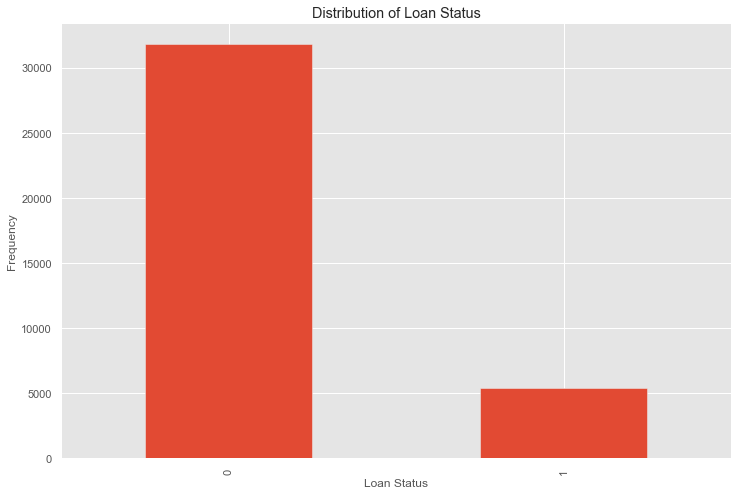

In [20]:
# Proportion of Applicants that charged off and Fully paid 
df['loan_status'].value_counts().plot.bar()
plt.title("Distribution of Loan Status")
plt.xlabel('Loan Status')
plt.ylabel("Frequency")

#### 0 = Fully paid <br> 1 = Charged off <br> 14.5% of borrowers defaulted on their loan <br><br><br>

Text(0.5, 1.0, 'Proportion of Total funded amount towards different purposes')

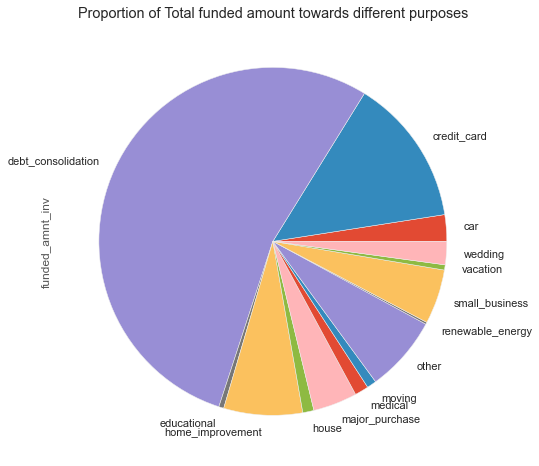

In [21]:
# Funded amount towards different purposes
df.groupby('purpose')['funded_amnt_inv'].sum().plot.pie()
plt.title('Proportion of Total funded amount towards different purposes')

Text(0, 0.5, 'Number of Loans')

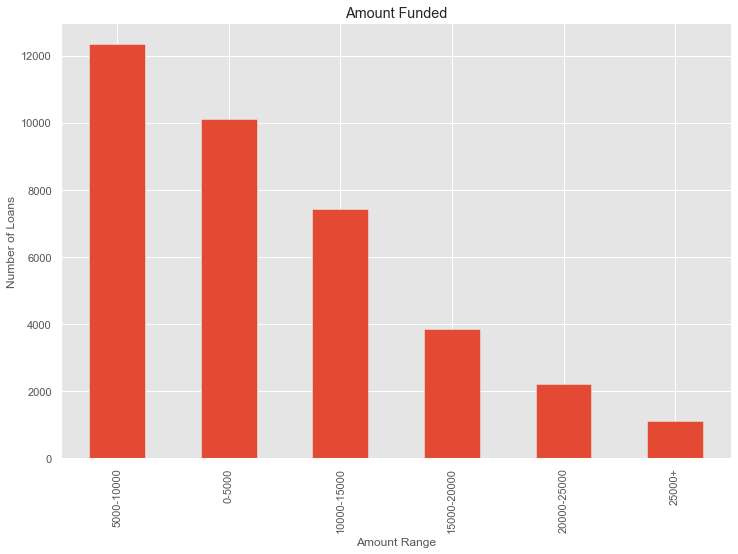

In [22]:
#Proportion of amount funded
df['funded_amnt_range'].value_counts().plot.bar()
plt.title("Amount Funded")
plt.xlabel('Amount Range')
plt.ylabel("Number of Loans")

Text(0, 0.5, 'Frequency')

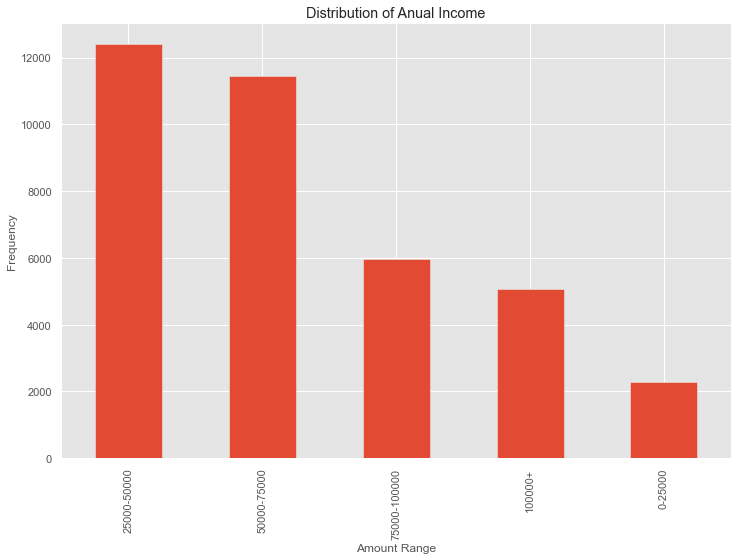

In [23]:
#Proportion of Annual Income
df['annual_inc_range'].value_counts().plot.bar()
plt.title("Distribution of Anual Income")
plt.xlabel('Amount Range')
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

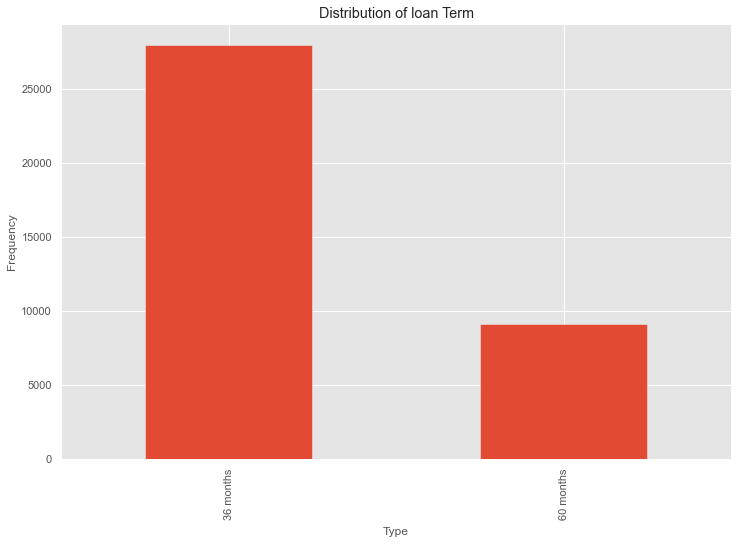

In [24]:
#Proportion of Term of loan
df['term'].value_counts().plot.bar()
plt.title("Distribution of loan Term")
plt.xlabel('Type')
plt.ylabel("Frequency")

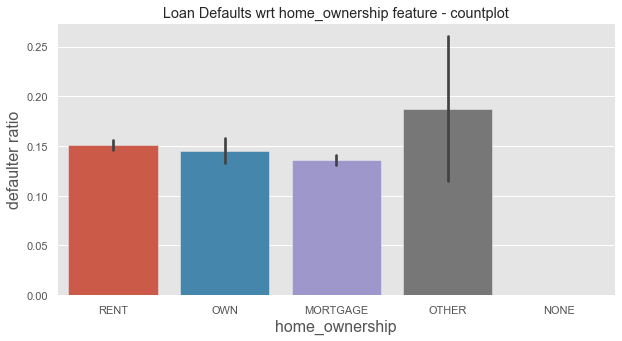

In [25]:
# Proportion of 'home_ownership' values against the default rate
plotUnivariateBar('home_ownership')

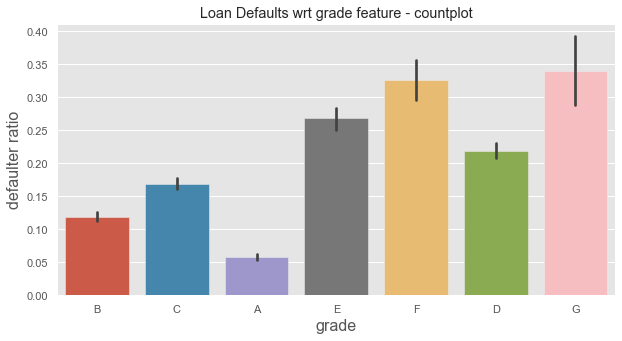

In [26]:
# Proportion of 'grade' values against the default rate
plotUnivariateBar('grade')

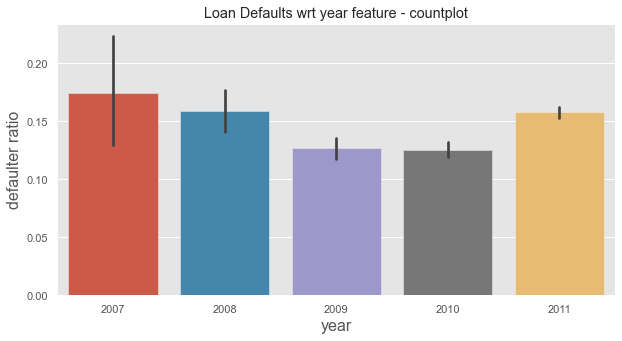

In [27]:
# Proportion of 'year' values against the default rate
plotUnivariateBar('year')

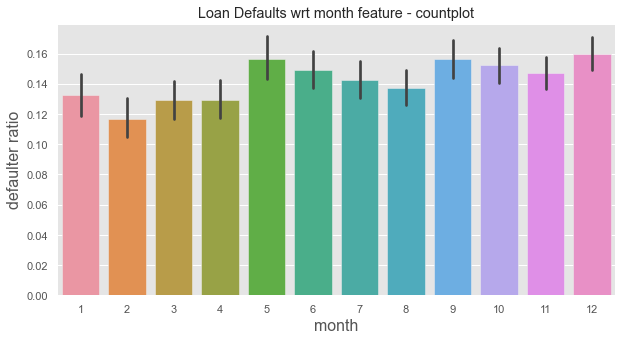

In [28]:
# Proportion of 'month' values against the default rate
plotUnivariateBar('month')

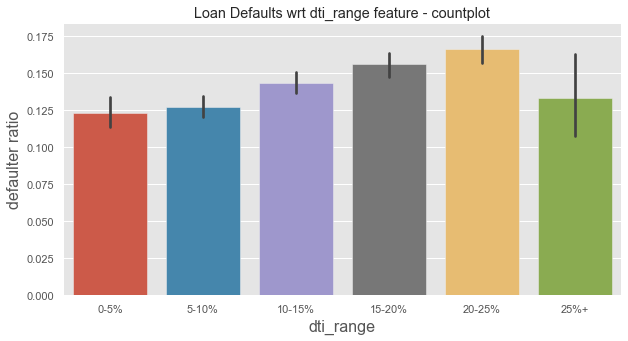

In [29]:
# Proportion of 'dti_range' values against the default rate
plotUnivariateBar('dti_range')

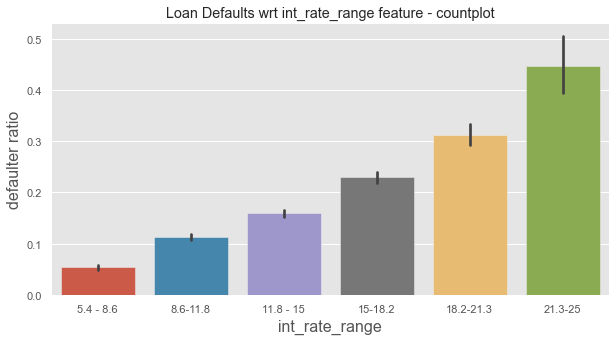

In [30]:
# Proportion of 'int_rate_range' values against the default rate
plotUnivariateBar('int_rate_range')

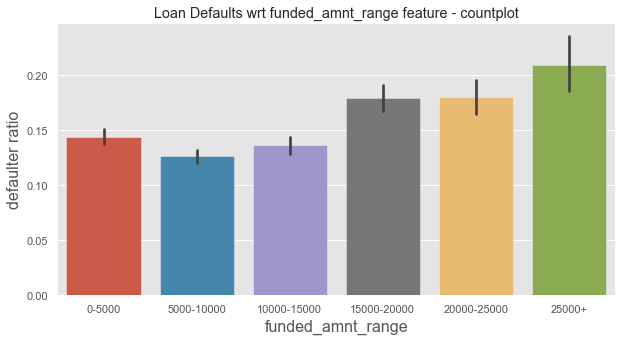

In [31]:
# Proportion of 'funded_amnt_range' values against the default rate
plotUnivariateBar('funded_amnt_range')    

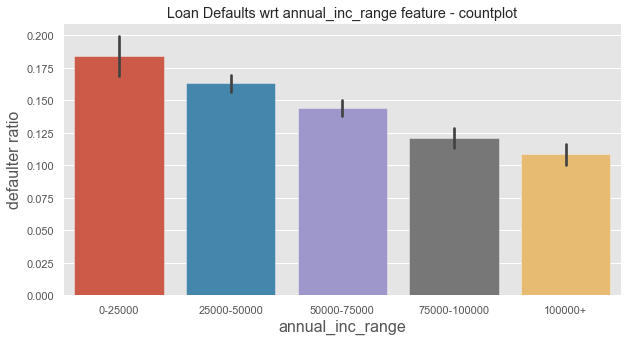

In [32]:
# Proportion of 'annual_inc_range' values against the default rate
plotUnivariateBar('annual_inc_range')

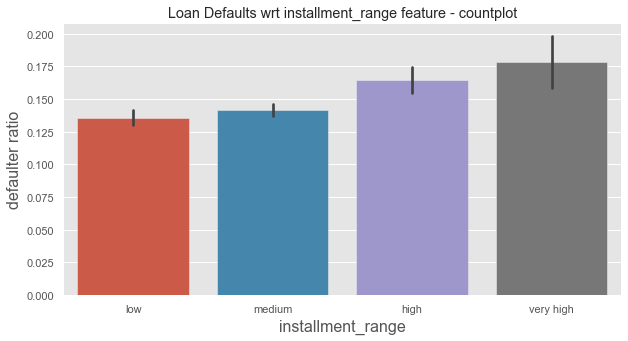

In [33]:
# Proportion of 'installment_range' values against the default rate
plotUnivariateBar('installment_range')

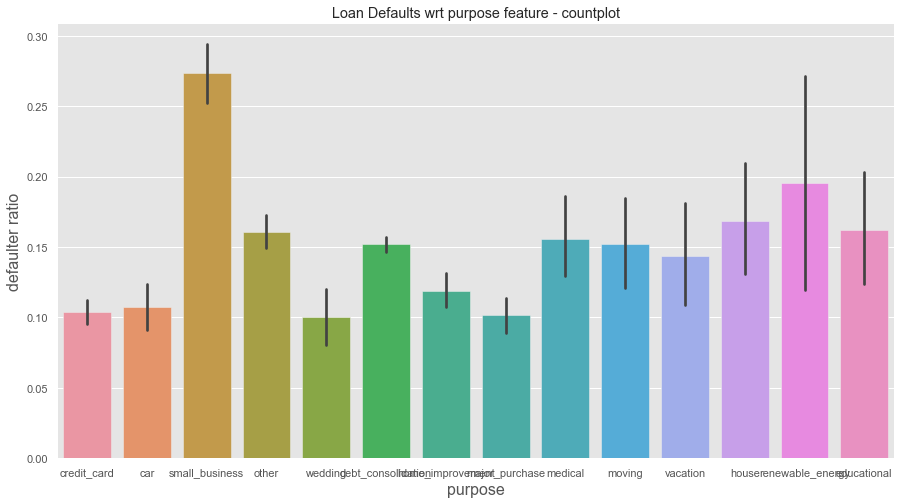

In [34]:
# Proportion of 'purpose' values against the default rate
plotUnivariateBar('purpose',figsize=(15,8))

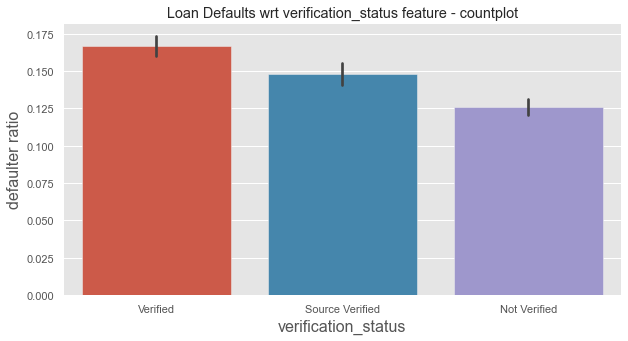

In [35]:
# Proportion of 'purpose' values against the default rate
plotUnivariateBar('verification_status')

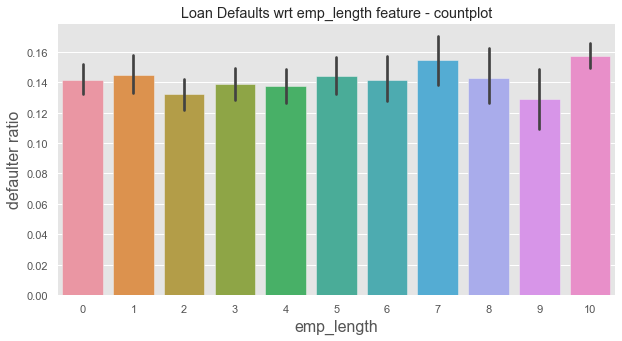

In [36]:
# Proportion of 'emp_length' values against the default rate
plotUnivariateBar('emp_length')

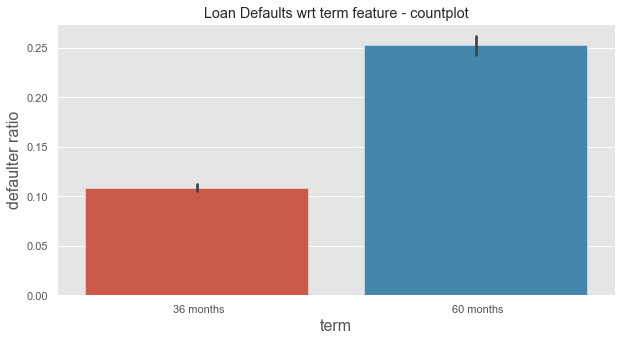

In [37]:
# Proportion of 'term' values against the default rate
plotUnivariateBar('term')

In [38]:
# function to plot scatter plot for two features
def plotScatter(x, y):
    plt.figure(figsize=(16,6))
    sns.scatterplot(x=x, y=y, hue="loan_status", data=df)
    plt.title("Scatter plot between "+x+" and "+y)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
    
def plotBivariateBar(x, hue, figsize=(16,6)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_status', hue=hue, data=df)
    plt.title("Loan Default ratio wrt "+x+" feature for hue "+hue+" in the data using countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()

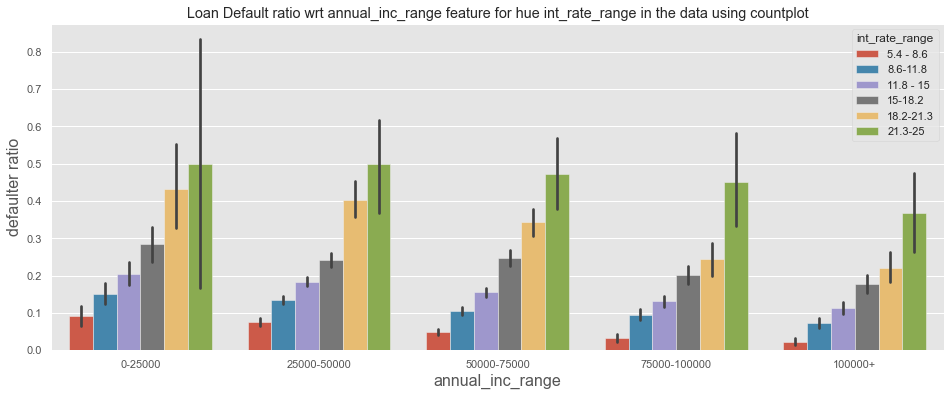

In [39]:
# Proportion of 'annual_inc_range' & 'int_rate_range' values against the default rate
plotBivariateBar('annual_inc_range', 'int_rate_range')

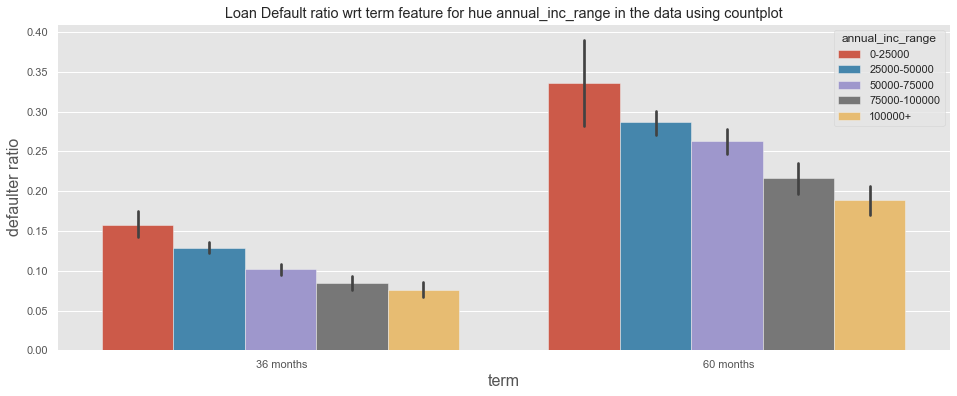

In [40]:
# Proportion of 'term' & 'annual_inc_range' values against the default rate
plotBivariateBar('term', 'annual_inc_range')

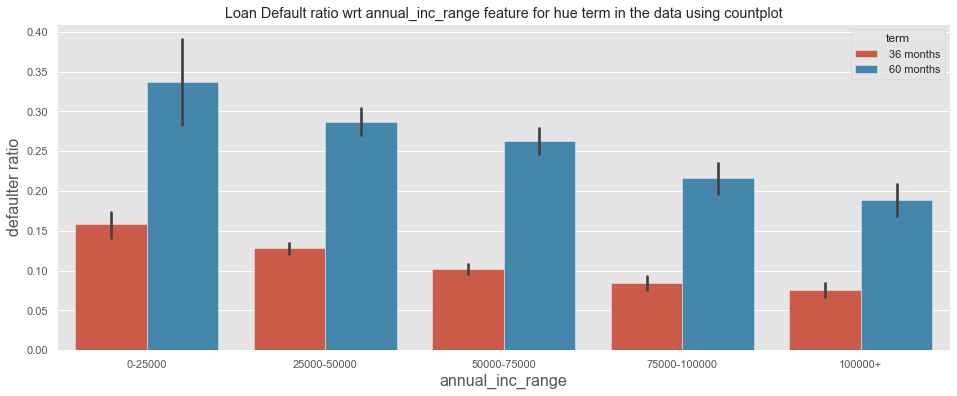

In [41]:
# Proportion of 'annual_inc_range' & 'term' values against the default rate
plotBivariateBar('annual_inc_range', 'term')

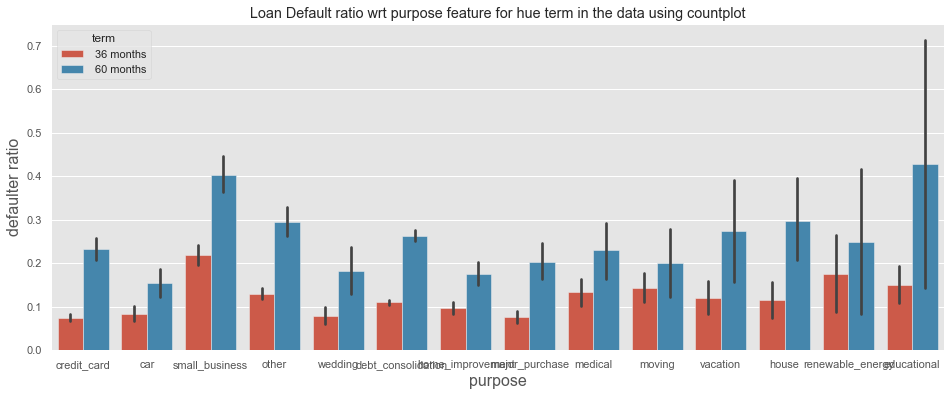

In [42]:
# Proportion of 'purpose' & 'term' values against the default rate
plotBivariateBar('purpose', 'term')

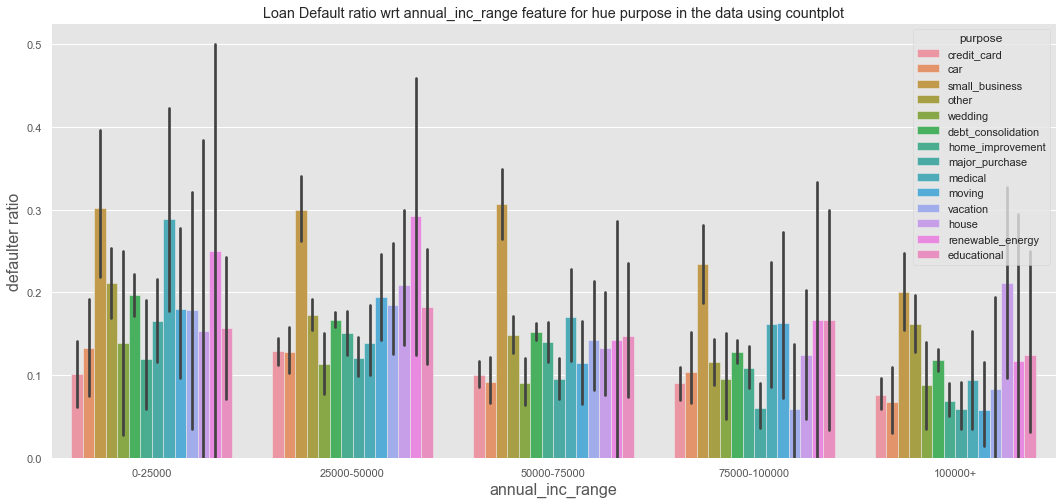

In [43]:
# Proportion of 'annual_inc_range' & 'purpose' values against the default rate
plotBivariateBar("annual_inc_range", "purpose",figsize=(18,8))

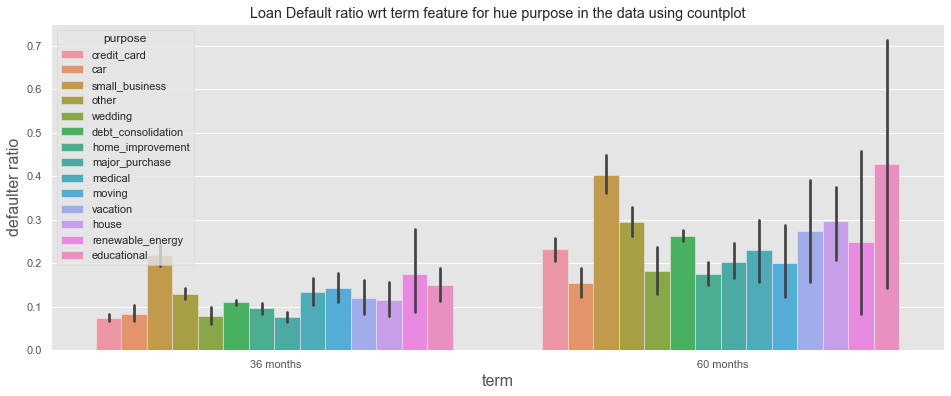

In [44]:
# Proportion of 'term' & 'purpose' values against the default rate
plotBivariateBar("term", "purpose")

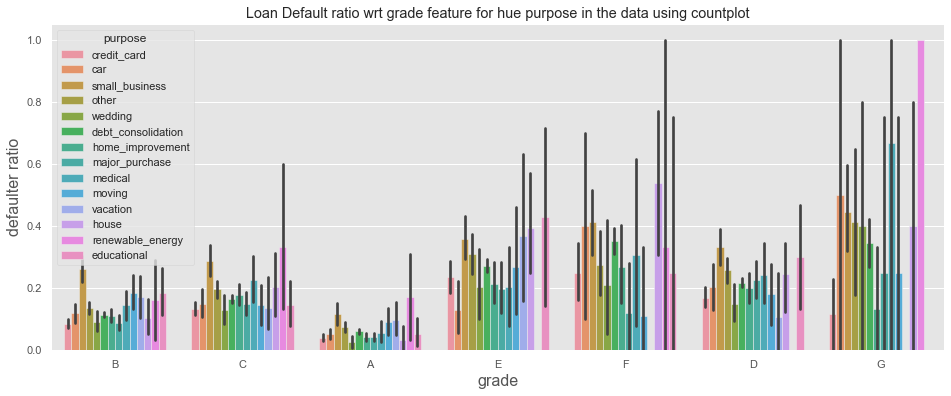

In [45]:
# Proportion of 'grade' & 'purpose' values against the default rate
plotBivariateBar("grade", "purpose")

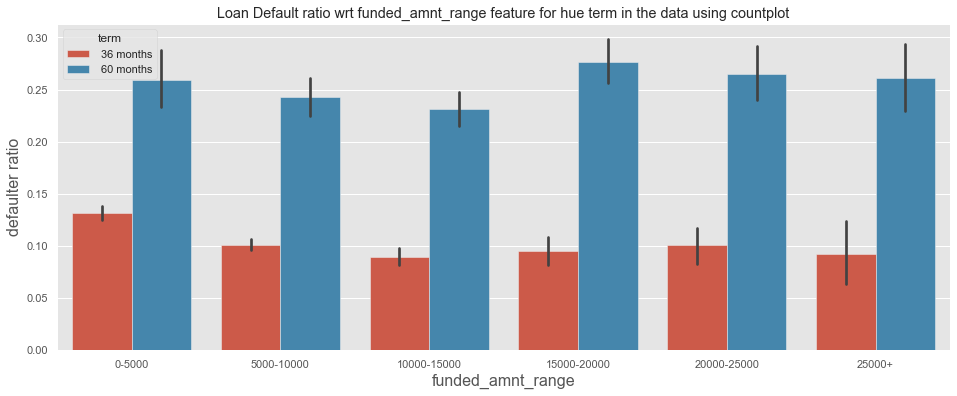

In [46]:
# Proportion of 'funded_amnt_range' & 'term' values against the default rate
plotBivariateBar("funded_amnt_range", "term")

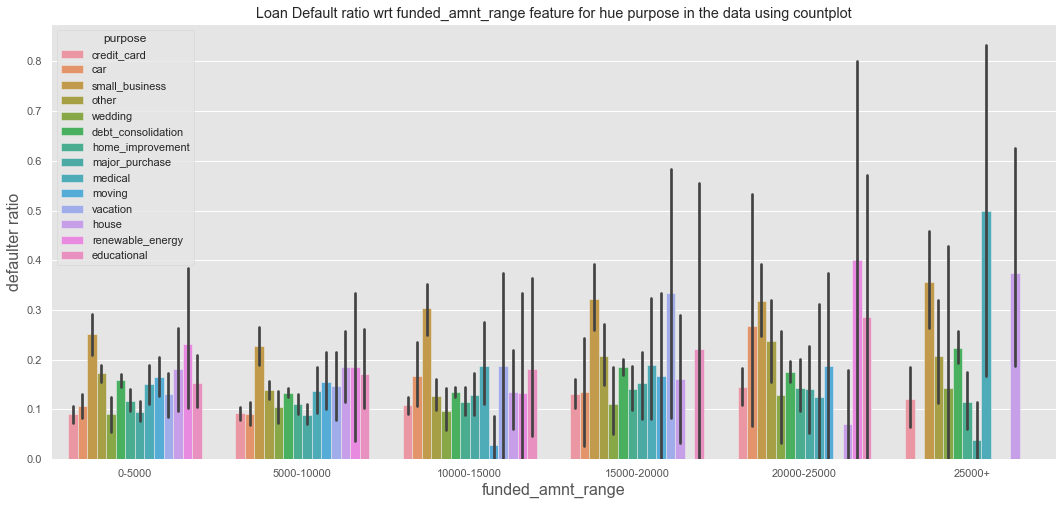

In [47]:
# Proportion of 'funded_amnt_range' & 'purpose' values against the default rate
plotBivariateBar("funded_amnt_range", "purpose",figsize=(18,8))

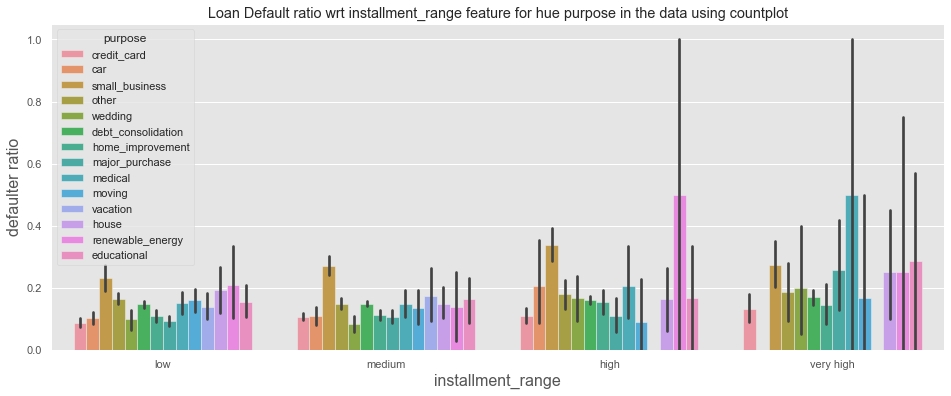

In [48]:
# Proportion of 'installment_range' & 'purpose' values against the default rate
plotBivariateBar("installment_range", "purpose")

<br><br><br>
### Multivariate Analysis

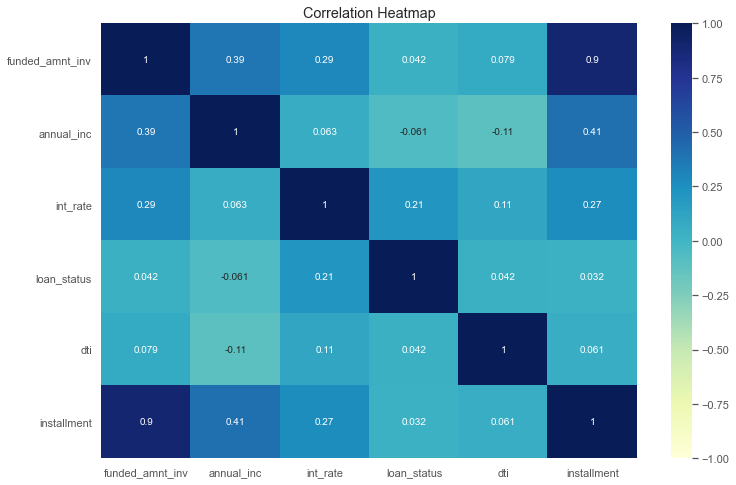

In [49]:
# plot heat map to see correlation between features
continuous_f = ["funded_amnt_inv", "annual_inc", "term", "int_rate", "loan_status",'dti', 'installment']
loan_corr = df[continuous_f].corr()
sns.heatmap(loan_corr,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

# Conclusion

### The variables that show significant patterns and can be predictors if a applicant will default or not are <br>
#### Anual Income (annual_inc) - Lower the income, higher chance of defaulting
#### Interest rate (int_rate) - Higher the interest rate, higher chance of defaulting
#### Purpose - Loans for the purpose of small businesses have a higher chance of defaulting
#### Term - Loans that are taken for 60 months have twice the chance of defaulting
#### Loan reveieved (funded_amnt_inv) - Higher the loan borrowed, higher the chance of defaulting
#### Installments - Higher the monthly installments, higher the chance of defaulting 
#### DTI - Higher the DTI, higher the probability of defaulting